# THE HAPPIEST NEIGHBORHOOD IN PITTSBURGH #

Brian Lee

## Parks ##

The metric I used to determine the happiness of a neighborhood is the number of parks. The logic behind this choice is that parks provide spaces for recreation, relaxation, and social interaction, all of which contribute to residents' well-being. More parks often mean greater opportunities for outdoor activities and community engagement, fostering a happier and healthier environment.

To start off, lets first import all fo the libraries that we will need

In [39]:
# imports
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

Now lets see what data we are working with

In [41]:
#read and display park data
parks = pd.read_csv("city_parks.csv")
parks.head(5)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,28-Apr,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,1-Feb,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,20-Jan,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,20-Jan,40.447184,-80.002907


The data set has a lot of different information but we only need the name of the neighborhood for each park

In [76]:
parks[[ 'neighborhood']].head(10)

,neighborhood
0,Beechview
1,Crawford-Roberts
2,North Shore
3,Allegheny Center
4,North Shore
5,Central Business District
6,Central Northside
7,Beechview
8,East Liberty
9,Bedford Dwellings


Now lets count how many parks there are in total for each neighborhood

In [45]:
num_parks = parks.groupby('neighborhood')['type'].count().reset_index()
num_parks.columns = ['Neighborhood', 'Total_Parks']
num_parks = num_parks.sort_values(by='Total_Parks', ascending=False)

print(num_parks)

                 Neighborhood  Total_Parks
22               East Liberty           12
13  Central Business District           10
5                   Beechview            8
50               Point Breeze            7
57          South Side Slopes            7
..                        ...          ...
34              Homewood West            1
47                    Oakwood            1
41                Middle Hill            1
45              North Oakland            1
72                    Windgap            1

[73 rows x 2 columns]


This is great, but it is a bit hard to visualize so let's graph it out

Text(0.5, 1.0, 'Total Parks per Neighborhood')

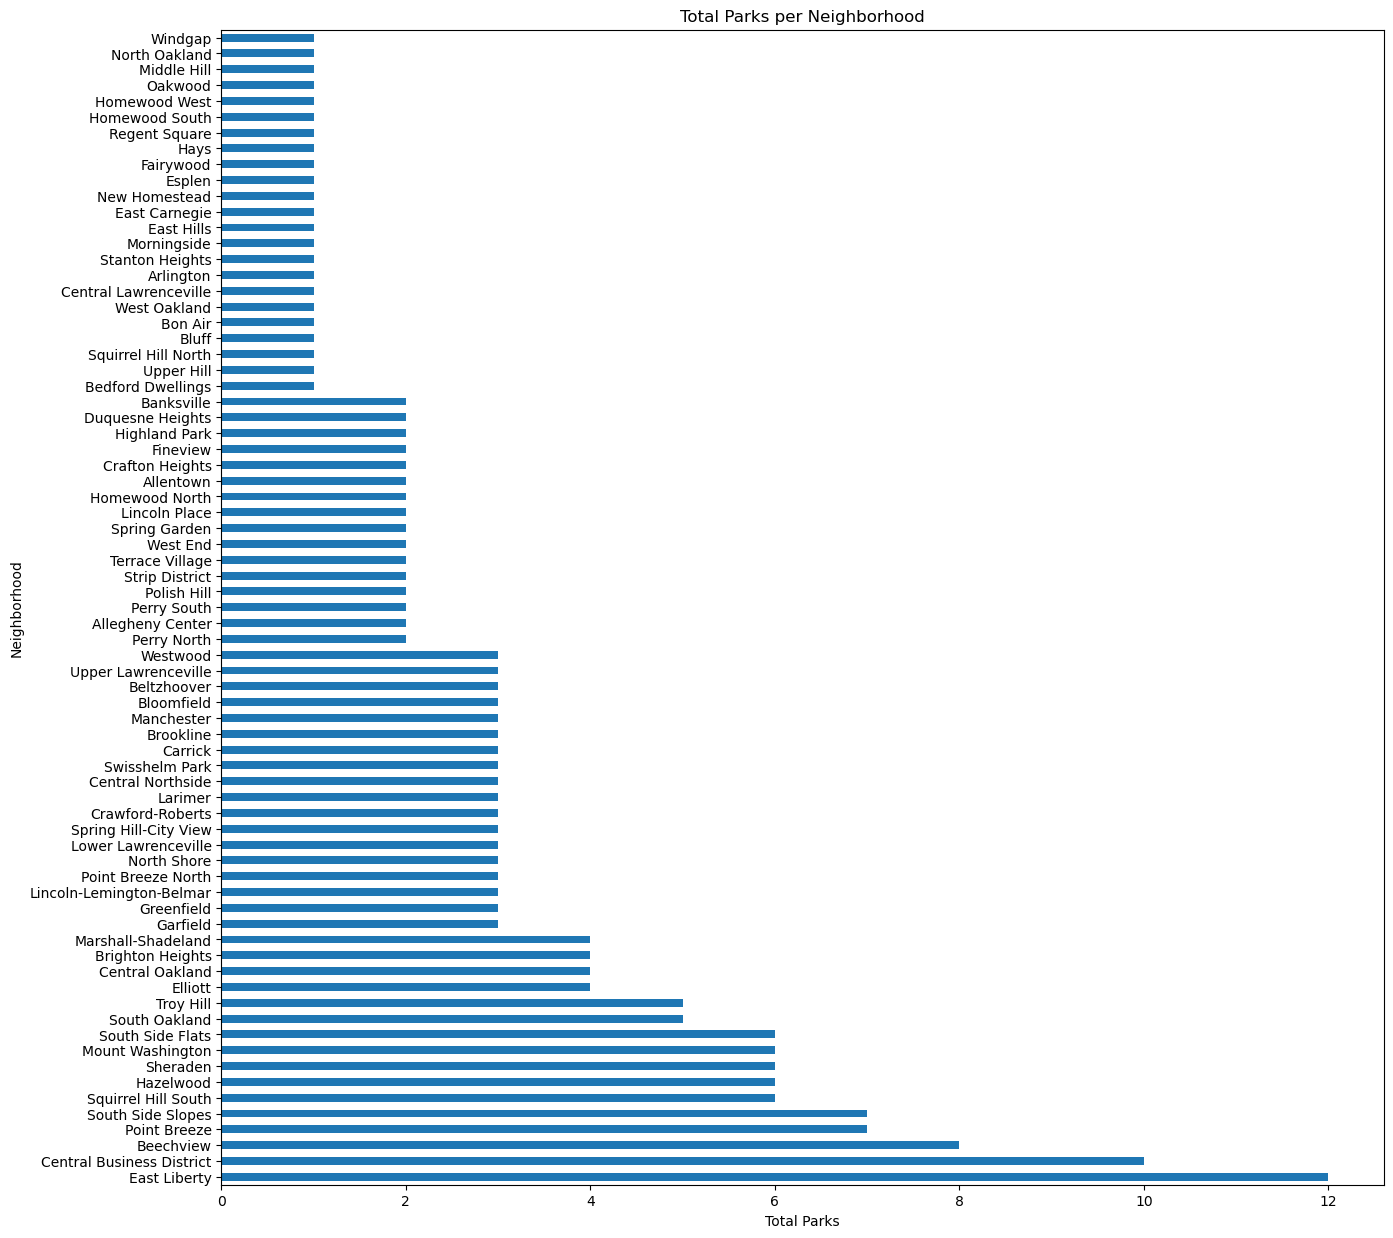

In [55]:
graph = num_parks.plot.barh(x="Neighborhood", y="Total_Parks", figsize=(15,15), legend=None)
plt.xlabel('Total Parks')
plt.title('Total Parks per Neighborhood')

So now we see that neighborhoods such as East Liberty, Central Buisiness District, and Beechview have the most parks. But this isn't a great metric to use as some of these neighborhoods are larger than the others. So let's use the population of each neighborhood and compare them to the number of parks.

In [47]:
population = pd.read_csv("population.csv")
population[['Neighborhood', 'Estimate; Total']].head(15)

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
5,Banksville,3858.0
6,Bedford Dwellings,1349.0
7,Beechview,8078.0
8,Beltzhoover,1702.0
9,Bloomfield,8669.0


To do this we have to merge the data together and do some calculations. But the data right now is still kind of messy, so we clean the data by renaming the columns to be the same and standardize the neighborhood column. 

In [65]:
# Rename columns for consistency
population.rename(columns={'Estimate; Total': 'Population'}, inplace=True)
num_parks.rename(columns={'Total_Parks': 'Total Parks'}, inplace=True)

# Standardize Neighborhood column
population['Neighborhood'] = population['Neighborhood'].str.strip().str.lower()
num_parks['Neighborhood'] = num_parks['Neighborhood'].str.strip().str.lower()


Now that the data is cleaned we can merge the population and park data together to get a metric of people per park in a neighborhood and the neighborhood with the least people per park will be the best neighborhood in pittsburgh.

In [97]:
# Calculate People per Park
merged_data['People per Park'] = merged_data['Population'] / merged_data['Total Parks']

# Sort data by 'People per Park' in descending order
ranked_data = merged_data[['Neighborhood', 'People per Park']].sort_values(by='People per Park', ascending=False)

# Display the ranked DataFrame
print(ranked_data)


             Neighborhood  People per Park
76    squirrel hill north     11336.000000
56          north oakland      9602.000000
10                  bluff      6294.000000
17  central lawrenceville      4775.000000
79        stanton heights      4761.000000
..                    ...              ...
37                   hays       405.000000
80         strip district       373.500000
30                 esplen       309.000000
87               west end       117.500000
57            north shore        68.333333

[73 rows x 2 columns]


Now lets visualize this

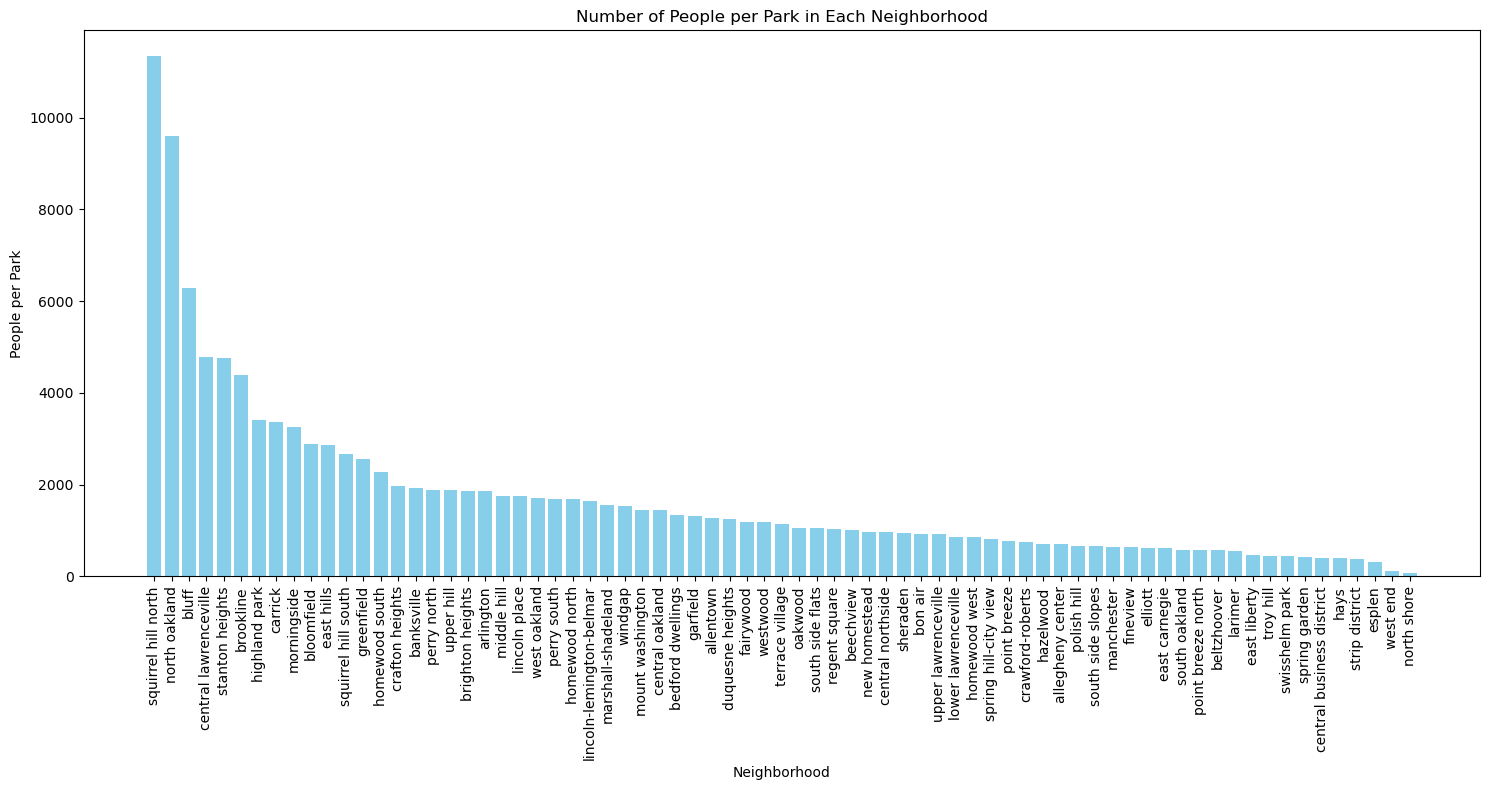

In [99]:
# Sort for better visualization
merged_data = merged_data.sort_values(by='People per Park', ascending=False)

# Plot
plt.figure(figsize=(15, 8))
plt.bar(merged_data['Neighborhood'], merged_data['People per Park'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('People per Park')
plt.title('Number of People per Park in Each Neighborhood')
plt.tight_layout()
plt.show()


But what's going on? according to the data set there are 4 neighborhoods with 0 people per park, making them automatically the best. This is because these neighborhoods don't have any parks therefore making them have 0 people per park. Let's do the graph again but filter out the neighborhoods without any parks. 

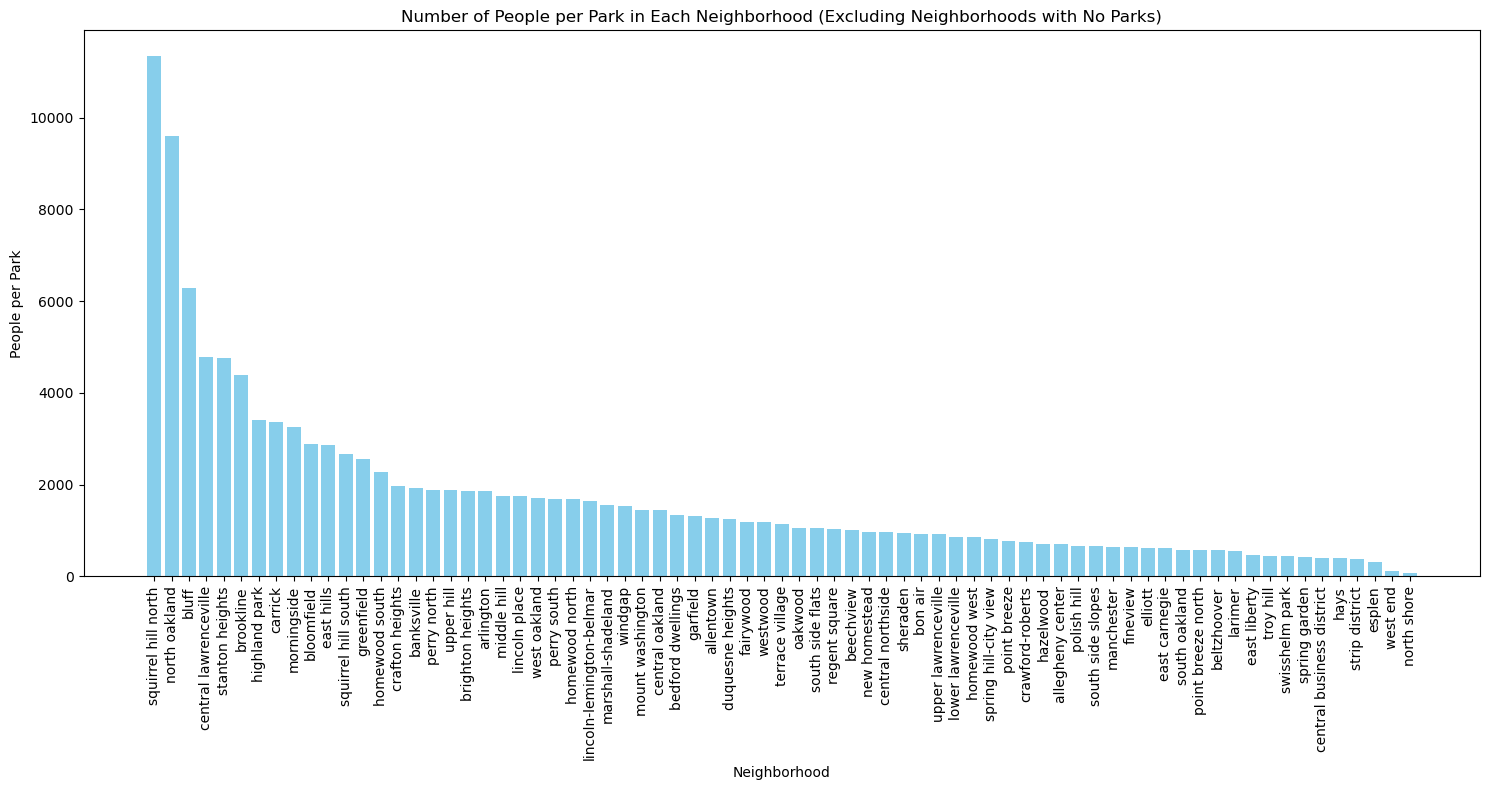

In [102]:
merged_data = pd.merge(population, num_parks, on='Neighborhood', how='left')
merged_data['Total Parks'] = merged_data['Total Parks'].fillna(0)

# Filter out neighborhoods without parks
merged_data = merged_data[merged_data['Total Parks'] > 0]

merged_data['People per Park'] = merged_data['Population'] / merged_data['Total Parks']
merged_data = merged_data.sort_values(by='People per Park', ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(merged_data['Neighborhood'], merged_data['People per Park'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('People per Park')
plt.title('Number of People per Park in Each Neighborhood (Excluding Neighborhoods with No Parks)')
plt.tight_layout()
plt.show()

And voila! we have a sorted chart of the neighborhoods with the least ammount of people per park. 

Here is a ranking of the top ten neighborhoods according to this metric.

1) North Shore
2) West End
3) Esplen
4) Strip District
5) Hays
6) Central Buisiness District
7) Spring Garden
8) Swisshelm park
9) Troy Hill
10) East Liberty


## Conclusion ##

Going into this, I didn't really have a favorite neighborhood as I am not a Pittsburgh native so I will go along with the best neighborhoods according to the data, is North Shore, with a whopping 68.3 people per park, followed by west end with 117.5/park, and esplen with 309.0/park